In [12]:
import requests
import time # import for playing nice and not getting blocked
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [13]:
url = "https://www.ss.com/lv/entertainment/sports/ski/skis/sell/riga_region_f/"
req = requests.get(url)

In [14]:
soup = BeautifulSoup(req.text, 'lxml')
headline = soup.find("tr", {"id":"head_line"}) 

In [15]:
headline = soup.find("tr", {"id":"head_line"}) 

In [16]:
headtds = headline.find_all("td")

In [17]:
headcolumns = [el.text for el in headtds[1:]]
headcolumns

['Ražotājs', 'Modelis', 'Gads', 'Garums', 'Stāv.', 'Cena']

In [18]:
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns
    return column_list

In [19]:
column_names = getColList(soup)

In [20]:
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [21]:
def getRow(row,colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [22]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]

In [23]:
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)

In [24]:
skis = "https://www.ss.com/lv/entertainment/sports/ski/skis/sell/filter/riga_f/fDgSeF4QEFF8FQ==.html"
idf = getDFfromURL(skis)
idf.head()

,description,url,Ražotājs,Modelis,Gads,Garums,Stāv.,Cena
0,Slēpes turētājs Thule Snowpack Extender 7325. ...,https://ss.com/msg/lv/entertainment/sports/ski...,Thule,732500,2021,625,jaun.,230 €
1,"Pilnīgi jaunas, iegādāties var Rīgas centrā. A...",https://ss.com/msg/lv/entertainment/sports/ski...,Salomon,Xdr,2021,160,jaun.,220 €
2,Pārdodu ļoti labā stāvoklī freestyle slēpes K2...,https://ss.com/msg/lv/entertainment/sports/ski...,K2,Domain,2012,174,lietota,300 €
3,"В комплекте ботинки Salomon размер 44-45, палк...",https://ss.com/msg/lv/entertainment/sports/ski...,Head,Extreme,2010,150,lietota,50 €
4,"Pārdod Fischer The Curv (2017 g. , 178cm/sidec...",https://ss.com/msg/lv/entertainment/sports/ski...,Fischer,The Curv,2017,178,lietota,250 €


In [25]:
ski_boots = "https://www.ss.com/lv/entertainment/sports/ski/ski-boots/filter/riga_f/"
idf = getDFfromURL(skis)
idf.head()

,description,url,Ražotājs,Modelis,Gads,Garums,Stāv.,Cena
0,Slēpes turētājs Thule Snowpack Extender 7325. ...,https://ss.com/msg/lv/entertainment/sports/ski...,Thule,732500,2021,625,jaun.,230 €
1,"Pilnīgi jaunas, iegādāties var Rīgas centrā. A...",https://ss.com/msg/lv/entertainment/sports/ski...,Salomon,Xdr,2021,160,jaun.,220 €
2,Pārdodu ļoti labā stāvoklī freestyle slēpes K2...,https://ss.com/msg/lv/entertainment/sports/ski...,K2,Domain,2012,174,lietota,300 €
3,"В комплекте ботинки Salomon размер 44-45, палк...",https://ss.com/msg/lv/entertainment/sports/ski...,Head,Extreme,2010,150,lietota,50 €
4,"Pārdod Fischer The Curv (2017 g. , 178cm/sidec...",https://ss.com/msg/lv/entertainment/sports/ski...,Fischer,The Curv,2017,178,lietota,250 €


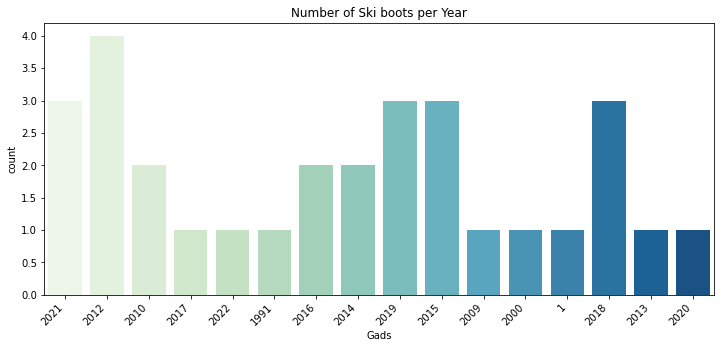

In [26]:
plt.figure(figsize=(12,5))
chart = sns.countplot(x='Gads', data = idf, palette='GnBu')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',   #escaping overlapping
    fontweight='light')

chart.set_title('Number of Ski boots per Year')

None

In [27]:
idf.to_csv('SS.com Ski Boots')

In [47]:
url_ener = "https://www.pxweb.bfs.admin.ch/pxweb/en/px-x-0204000000_106/px-x-0204000000_106/px-x-0204000000_106.px/table/tableViewLayout2/"
req = requests.get(url_ener)

In [40]:
soup = BeautifulSoup(req.text, 'lxml')

In [48]:
tables = soup.find_all("table") # finds ALL elements matching our filter
len(tables)

1

In [49]:
edf = getDFfromURL(url_ener)
edf.head()

AttributeError: 'NoneType' object has no attribute 'find_all'

In [34]:
energy_df.head()

,<!DOCTYPE html>
0,"<html dir=""ltr"" lang=""en-GB"""
1,"class=""no-js page-dataproducts "">"
2,<head>
3,"<meta charset=""utf-8"">"
4,"<meta name=""viewport"" content=""width=devic..."
